# Cito Toets 

#### Stap 1 Data verzamelen
* We halen de webpagina op waar eea in wordt uitgelegd, en het excel bestand met alle gegevens.
    * <http://www.rtlnieuws.nl/nieuws/binnenland/hoe-vergelijkt-rtl-nieuws-de-cito-scores-van-2014>
    * <http://www.rtlnieuws.nl/sites/default/files/content/documents/2014/07/07/scholenoverzicht_0.xls>
    
#### Stap 2 Inlezen in pandas, en wat eerste exploratie
* Hier wordt het prima uitgelegd:
    * <http://pbpython.com/pandas-pivot-table-explained.html>

#### Stap 3 Analyse

# Data verzamelen

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
scholenoverzicht = pd.read_excel("http://maartenmarx.nl/teaching/ISatWork/Data/CitoToets/scholenoverzicht_0.xls")
scholenoverzicht.head()

,BRIN,Vestiging,id,naam,adres,postcode,plaats,gemeente,provincie,denominatie,...,tellerdeelname,noemerdeelname,deelnaamper,meantoets,waretoets,RES1,PRED1,quasicito,verwacht,cijfer
0,23EK,0,23EK00,De Phoenix,Zalmkolk 2,8017 PA,Zwolle,Zwolle,Overijssel,Rooms-Katholiek,...,,,,,,,0.910815,NaN,537.351861,-
1,09CA,0,09CA00,Jan Jaspers,de Meenthe 28,8051 KV,Hattem,Hattem,Gelderland,Protestants-Christelijk,...,29,29,100,-0.46357,-0.46357,-1.01519,0.551622,531.447503,535.808769,-
2,30RP,0,30RP00,De Verbinding,Jan Greshoffstraat 5,3069 WG,Rotterdam,Rotterdam,Zuid-Holland,Algemeen Bijzonder,...,,,,,,,0.178813,NaN,534.207181,-
3,30PN,0,30PN00,EBS Tabitha,Jachthoornlaan 15,7312 CD,Apeldoorn,Apeldoorn,Gelderland,Evangelisch,...,,,,,,,0.415624,NaN,535.224522,-
4,15UF,0,15UF00,obs De Springplank,Beukenstraat 83,8021 XA,Zwolle,Zwolle,Overijssel,Openbaar,...,20.5,23.5,87.234,0.222755,-0.0580963,0.763355,-0.821451,533.189418,529.910046,7.76335


In [17]:
xl_file = pd.ExcelFile('02.Onderwijspersoneel_po_in_fte-2010-2014_.xls', axis=0)

dfs = {sheet_name: xl_file.parse(sheet_name)
       for sheet_name in xl_file.sheet_names}


pers_fte = dfs['per owtype-bestuur-brin-functie'][["BRIN NUMMER", "FUNCTIEGROEP", "FTE'S 2012", "FTE'S 2013", "FTE'S 2014"]]
pers_fte_onderwijsgevend = pers_fte[pers_fte.FUNCTIEGROEP == 'Onderwijsgevend personeel']
pers_fte_onderwijsgevend.head(30)

,BRIN NUMMER,FUNCTIEGROEP,FTE'S 2012,FTE'S 2013,FTE'S 2014
1,16AH,Onderwijsgevend personeel,10.0345,9.1019,10.2489
3,16BX,Onderwijsgevend personeel,3.7861,3.7830,3.7830
6,16DJ,Onderwijsgevend personeel,4.0894,4.6451,4.7808
8,16HI,Onderwijsgevend personeel,8.0842,6.7786,6.6984
10,16MA,Onderwijsgevend personeel,25.5978,23.5600,25.1079
13,16NR,Onderwijsgevend personeel,11.4994,15.2640,12.1381
15,16UA,Onderwijsgevend personeel,9.5409,9.4522,8.4784
18,16WN,Onderwijsgevend personeel,5.5566,4.7336,3.7220
21,16XQ,Onderwijsgevend personeel,16.0790,15.7023,18.3906
24,16YK,Onderwijsgevend personeel,6.1597,6.1597,6.2530


In [25]:
leerlingen1213 = pd.read_excel("01. Leerlingen bo - leerlinggewicht en schoolgewicht- 2012-2013.xls")
leerlingen1213_tot = leerlingen1213[['BRIN NUMMER', 'TOTAAL']]
leerlingen1213_tot = leerlingen1213_tot.rename(columns = {'TOTAAL':'TOTAAL 2012-2013'})
leerlingen1314 = pd.read_excel("01. Leerlingen bo - leerlinggewicht en schoolgewicht- 2013-2014.xls")
leerlingen1314_tot = leerlingen1314[['BRIN NUMMER', 'TOTAAL']]
leerlingen1314_tot = leerlingen1314_tot.rename(columns = {'TOTAAL':'TOTAAL 2013-2014'})
leerlingen1415 = pd.read_excel("01. Leerlingen bo - leerlinggewicht en schoolgewicht- 2014-2015.xls")
leerlingen1415_tot = leerlingen1415[['BRIN_NUMMER', 'TOTAAL']]
leerlingen1415_tot = leerlingen1415_tot.rename(columns = {'TOTAAL':'TOTAAL 2014-2015'})
leerlingen1415_tot = leerlingen1415_tot.rename(columns = {'BRIN_NUMMER':'BRIN NUMMER'})

In [29]:
leerlingen_tot = pd.merge(pd.merge(leerlingen1213_tot,leerlingen1314_tot,on='BRIN NUMMER'),leerlingen1415_tot,on='BRIN NUMMER')
leerlingen_tot.head()

,BRIN NUMMER,TOTAAL 2012-2013,TOTAAL 2013-2014,TOTAAL 2014-2015
0,00AP,94,96,88
1,00AR,150,143,141
2,00AV,58,58,59
3,00AZ,77,79,133
4,00BA,117,113,106


In [32]:
fte_leerlingen = pd.merge(leerlingen_tot, pers_fte_onderwijsgevend,on='BRIN NUMMER')
fte_leerlingen = fte_leerlingen.drop('FUNCTIEGROEP', axis=1)
fte_leerlingen.head()

,BRIN NUMMER,TOTAAL 2012-2013,TOTAAL 2013-2014,TOTAAL 2014-2015,FTE'S 2012,FTE'S 2013,FTE'S 2014
0,00AP,94,96,88,3.6178,4.0381,4.1248
1,00AR,150,143,141,7.8546,7.9405,8.0966
2,00AV,58,58,59,3.7080,4.0251,4.6444
3,00AZ,77,79,133,10.9558,8.6015,8.0380
4,00BA,117,113,106,6.3295,7.0346,6.3348


In [33]:
fte_leerlingen['Leerlingen per fte 2012-2013'] = fte_leerlingen['TOTAAL 2012-2013'] / fte_leerlingen["FTE'S 2012"]
fte_leerlingen['Leerlingen per fte 2013-2014'] = fte_leerlingen['TOTAAL 2013-2014'] / fte_leerlingen["FTE'S 2013"]
fte_leerlingen['Leerlingen per fte 2014-2015'] = fte_leerlingen['TOTAAL 2014-2015'] / fte_leerlingen["FTE'S 2014"]

fte_leerlingen.head(20)

,BRIN NUMMER,TOTAAL 2012-2013,TOTAAL 2013-2014,TOTAAL 2014-2015,FTE'S 2012,FTE'S 2013,FTE'S 2014,Leerlingen per fte 2012-2013,Leerlingen per fte 2013-2014,Leerlingen per fte 2014-2015
0,00AP,94,96,88,3.6178,4.038100,4.1248,25.982641,23.773557,21.334368
1,00AR,150,143,141,7.8546,7.940500,8.0966,19.097090,18.008942,17.414717
2,00AV,58,58,59,3.7080,4.025100,4.6444,15.641855,14.409580,12.703471
3,00AZ,77,79,133,10.9558,8.601500,8.0380,7.028241,9.184445,16.546405
4,00BA,117,113,106,6.3295,7.034600,6.3348,18.484872,16.063458,16.732967
5,00BB,109,103,98,9.0515,10.905791,6.4256,12.042203,9.444523,15.251494
6,00BS,127,127,128,5.7147,5.081900,5.0669,22.223389,24.990653,25.261995
7,00BW,95,86,98,10.9904,9.740900,8.6284,8.643907,8.828753,11.357842
8,00CD,191,179,160,8.6081,9.603000,7.0035,22.188404,18.640008,22.845720
9,00CG,371,378,389,21.9891,19.046900,19.3149,16.871996,19.845749,20.139892


## Correlatie tussen cito score en inkomen

Pearson Correlation (R)


,quasicito,inkomen
quasicito,1.000000,0.473327
inkomen,0.473327,1.000000


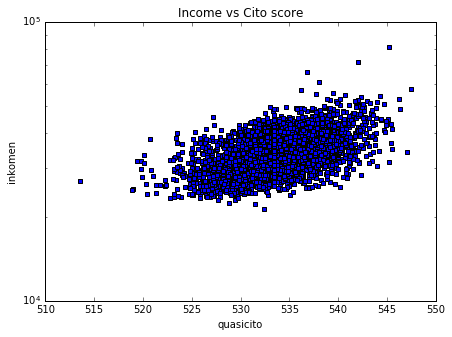

In [20]:
## Correlatie tussen cito score en inkomen

cito_income= df_2014cito[['quasicito','inkomen']]
cito_income.plot(kind='scatter', marker='s', logy=True, figsize=(7, 5), x = 'quasicito', y = 'inkomen', title= 'Income vs Cito score')

# Correlation
print 'Pearson Correlation (R)'
cito_income.corr(method='pearson')